Step-1 Import Data

In [1]:
# Import all the given datasets and explore shape and size
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
signal_attributes_df = pd.read_csv('Part- 1,2&3 - Signal.csv')

signal_attributes_df.shape

(1599, 12)

In [2]:
#%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [3]:
# Let us get the report of the data:
#signal_attributes_df.profile_report()

In [6]:
signal_attributes_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#Check for missing values
signal_attributes_df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

As can be seen above the cells do not have any missing value.

# The first strategy is to get the linear regression coefficients using the normal method without using neural networks. By this we can also find out which parameters are having the most significant effect

In [8]:
# let us now get the dependent and the independent attributes in the data-set:
X =  signal_attributes_df.drop(["Signal_Strength"],axis=1)
Y =  signal_attributes_df[["Signal_Strength"]]
print("shape of X", X.shape)
print("shape of X", Y.shape)
X.describe()

#X_features = ['Parameter 1','Parameter 2', 'Parameter 3','Parameter 4','Parameter 5','Parameter 6','Parameter 7','Parameter 8','Parameter 9','Parameter 10','Parameter 11']
#Y_feature=['Signal_Strength']

shape of X (1599, 11)
shape of X (1599, 1)


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


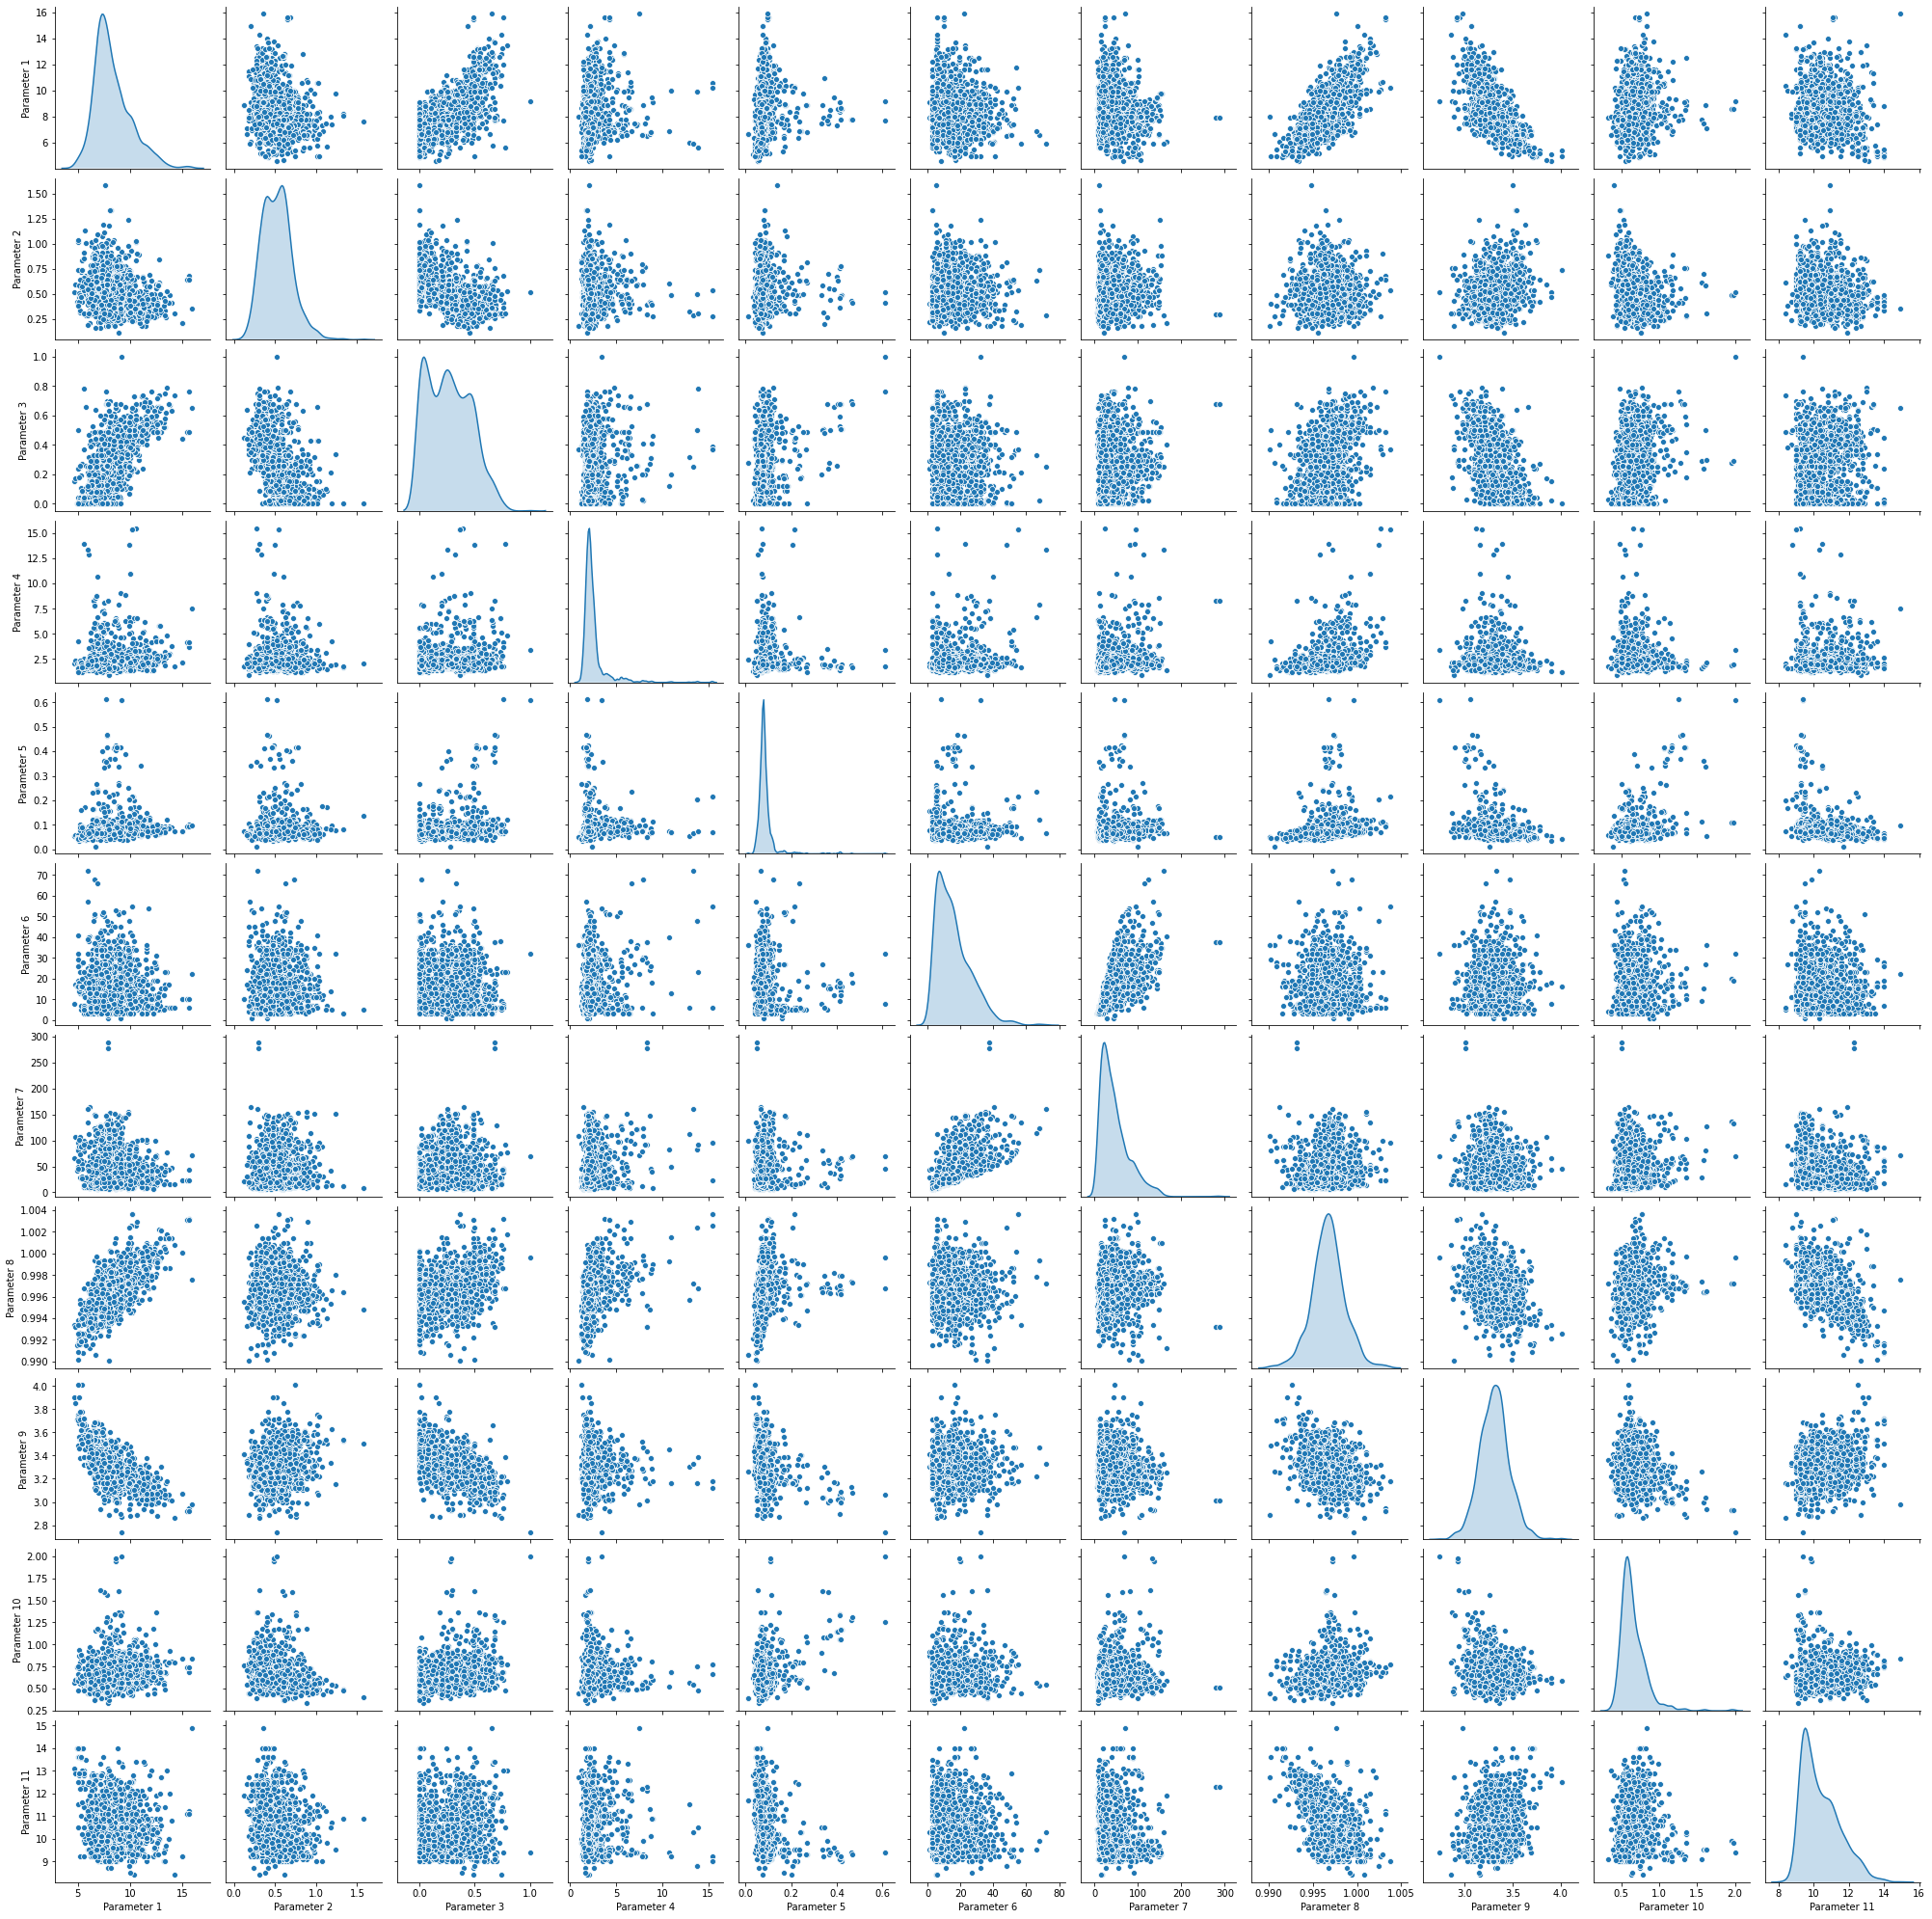

In [9]:
sns.pairplot(X, diag_kind='kde')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled=scaler.fit_transform(X)
X_Scaled_df=pd.DataFrame(X_scaled)
X_Scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,4.838739e-16,1.432042e-16,1.289532e-16,2.336509e-14,3.002879e-15,7.639596e-16,-6.742574e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


In [11]:
X.corr()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [12]:
# Correlation heat map
def plot_corr(df, size=20):
    corr=df.corr()
    fig, ax= plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

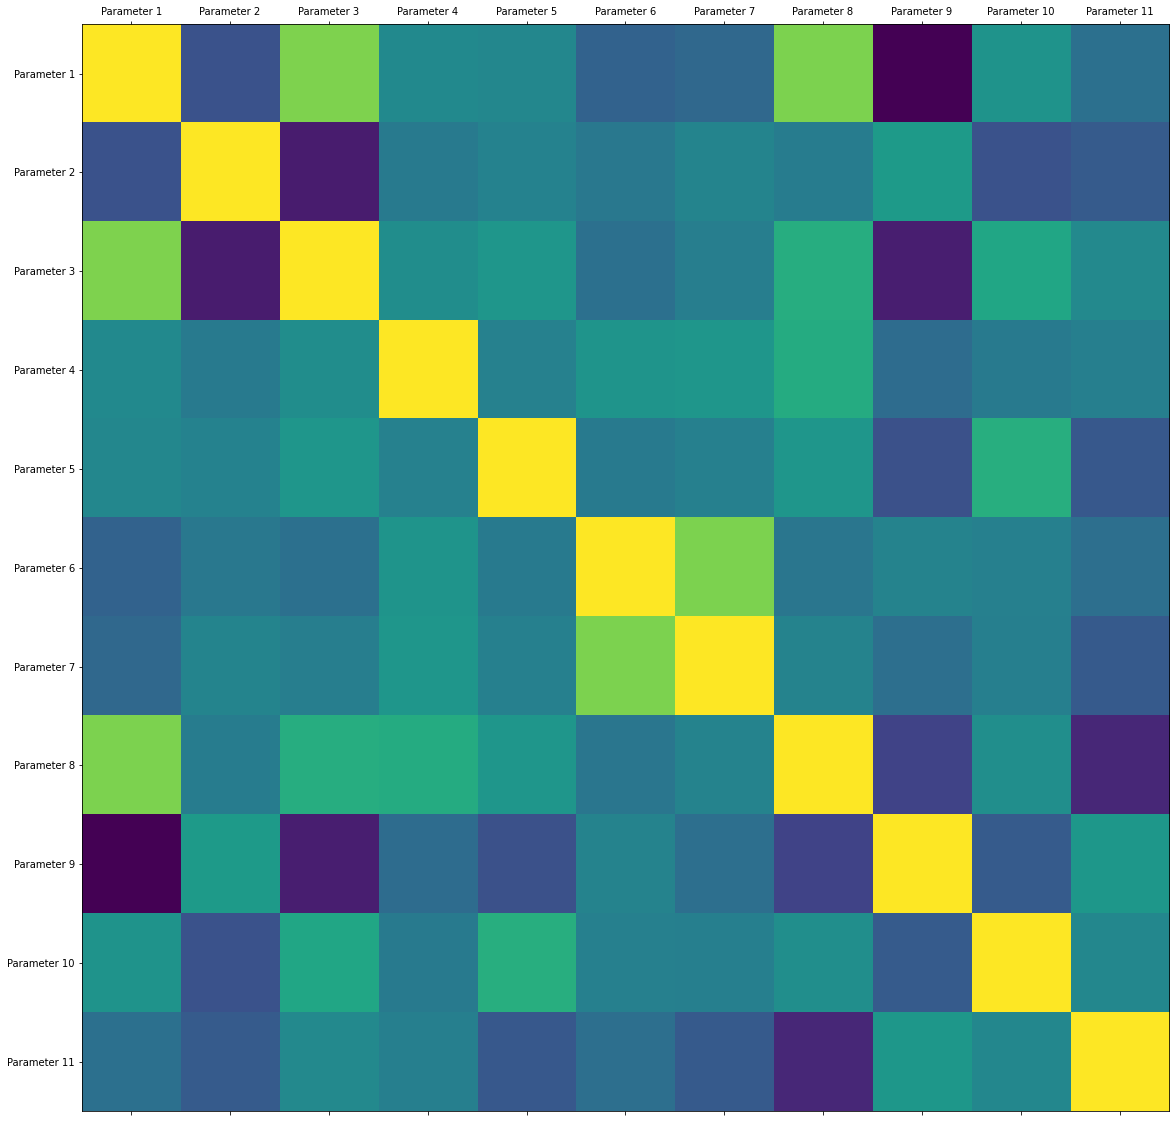

In [13]:
plot_corr(X)

Based on the correlation heat map it does not look like any of the parameters are heavily correlated..

In [14]:
# let us check the number of categories in the output data
signal_attributes_df["Signal_Strength"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

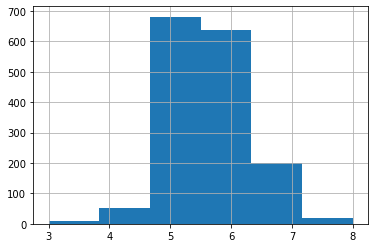

In [15]:
signal_attributes_df["Signal_Strength"].hist(bins=6)

In [16]:
from imblearn.over_sampling import SMOTE

print("Before UpSampling, counts of label '5': {}".format((Y==5).sum()))
print("Before UpSampling, counts of label '7': {}".format((Y==7).sum()))
print("Before UpSampling, counts of label '4': {}".format((Y==4).sum()))
print("Before UpSampling, counts of label '8': {}".format((Y==8).sum()))
print("Before UpSampling, counts of label '3': {}".format((Y==3).sum()))

#sm= SMOTE(sampling_strategy={7:471,4:471,8:471,3:471})

#X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

oversample=SMOTE()
X_res, y_res = oversample.fit_resample(X_Scaled_df, Y)

print("After UpSampling, counts of label '5': {}".format((y_res==5).sum()))
print("After UpSampling, counts of label '7': {}".format((y_res==5).sum()))
print("After UpSampling, counts of label '4': {}".format((y_res==5).sum()))
print("After UpSampling, counts of label '8': {}".format((y_res==5).sum()))
print("After UpSampling, counts of label '3': {}".format((y_res==5).sum()))
print("After UpSampling, counts of label '6': {}".format((y_res==5).sum()))

C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

Before UpSampling, counts of label '5': Signal_Strength    681
dtype: int64
Before UpSampling, counts of label '7': Signal_Strength    199
dtype: int64
Before UpSampling, counts of label '4': Signal_Strength    53
dtype: int64
Before UpSampling, counts of label '8': Signal_Strength    18
dtype: int64
Before UpSampling, counts of label '3': Signal_Strength    10
dtype: int64
After UpSampling, counts of label '5': 681
After UpSampling, counts of label '7': 681
After UpSampling, counts of label '4': 681
After UpSampling, counts of label '8': 681
After UpSampling, counts of label '3': 681
After UpSampling, counts of label '6': 681


C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\VISNN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, categor

In [76]:
# Let us split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=10)

In [83]:
X_test.shape

(1226, 11)

In [18]:
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

Max value in X_train: 9.19568145158918
Min value in X_train: -3.538731398195885


In [19]:
# Build the Linear Regression Model
from sklearn.linear_model import LinearRegression

In [87]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
linreg.score(X_test,y_test)

0.7190967982636312

In [21]:
linreg.coef_

array([-0.14193633, -0.42462947,  0.01359649, -0.03716621, -0.32883908,
       -0.00543661,  0.00253478, -0.07311503, -0.47147504,  0.32842072,
        0.66443507])

In [22]:
linreg.coef_.shape

(11,)

In [23]:
# let us create a dataframe to store the coefficients of the dataframe
#data = {'Name':['Tom', 'nick', 'krish', 'jack'],
     #   'Age':[20, 21, 19, 18]}
columns_coef_df = pd.DataFrame({'columns':X.columns,'coef':[ 0.03407051, -0.22825532, -0.04536747,  0.00121441, -0.08695557,
         0.03181788, -0.10902711, -0.00926382, -0.04699423,  0.13917596,
         0.28006219] })

In [24]:
sorted_coef_vals=columns_coef_df.sort_values('coef',ascending=False)
sorted_coef_vals

,columns,coef
10,Parameter 11,0.280062
9,Parameter 10,0.139176
0,Parameter 1,0.034071
5,Parameter 6,0.031818
3,Parameter 4,0.001214
7,Parameter 8,-0.009264
2,Parameter 3,-0.045367
8,Parameter 9,-0.046994
4,Parameter 5,-0.086956
6,Parameter 7,-0.109027


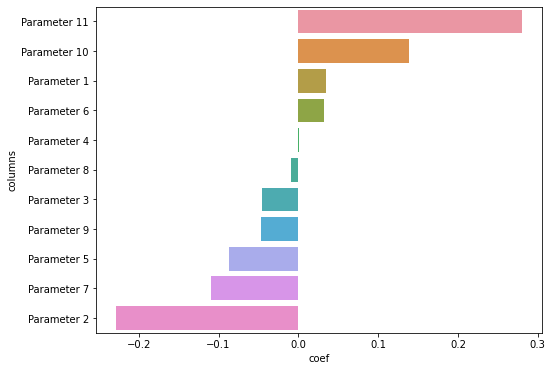

In [25]:
# creating a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='coef',y='columns',data=sorted_coef_vals)

In [26]:
# CALCULATE THE RMSE FOR THE NORMAL LINEAR REGRESSION MODEL

from sklearn import metrics
# takes a model as a parameter
# prints the RMSE on train and test set
def get_train_test_rmse(model):
    
    # Predicting on training dataset
    
    y_train_pred = model.predict(X_train)
    # compare the actual y with the predicted y in the training dataset
    rmse_train=round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),3)
    
    # Predicting on test dataset
    
    y_test_pred = model.predict(X_test)
    # compare the actual y with the predicted y in the training dataset
    rmse_test=round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),3)
    
    print("train:",rmse_train,"test:", rmse_test)
    
    

In [27]:
get_train_test_rmse(linreg)

train: 0.909 test: 0.89


In [28]:
# From the above model we see that even if we drop the following parameters, the out put variabel may not change much:
# Parameter1 , 6,4,8,3,9

In [29]:
import random
random.seed(0)
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Now let us build a regressor based on Deep Neural Network

# Initialize Sequential model
from tensorflow.keras.regularizers import l2

model_R = tensorflow.keras.models.Sequential()

# Normalize input data
model_R.add(tensorflow.keras.layers.BatchNormalization(input_shape=(11,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_R.add(tensorflow.keras.layers.Dense(60,activation="relu"))
#model.add(Dense(50,activation="relu"))
model_R.add(tensorflow.keras.layers.Dense(1,activation="linear"))

In [31]:
# Compile the model
model_R.compile(optimizer='sgd',loss='mse',metrics=["accuracy"])

In [67]:
history= model_R.fit(X_train,y_train, epochs=100, validation_split=0.30)
#history=model.fit(X_train, y_train, batch_size=64, epochs=300, validation_data=(X_test, y_test_encoded))

Epoch 1/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.0000e+00 - val_loss: 0.4977 - val_accuracy: 0.0000e+00
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.0000e+00 - val_loss: 0.4205 - val_accuracy: 0.0000e+00
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.0000e+00 - val_loss: 0.4044 - val_accuracy: 0.0000e+00
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.0000e+00 - val_loss: 0.4100 - val_accuracy: 0.0000e+00
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.0000e+00 - val_loss: 0.3845 - val_accuracy: 0.0000e+00
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4156 - accuracy: 0.0000e+00 - val_loss: 0.4240 - val_accuracy: 0.0000e+00
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.0000e+00 - v

Epoch 56/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.0000e+00 - val_loss: 0.3957 - val_accuracy: 0.0000e+00
Epoch 57/100
63/63 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.0000e+00 - val_loss: 0.4201 - val_accuracy: 0.0000e+00
Epoch 58/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.0000e+00 - val_loss: 0.4906 - val_accuracy: 0.0000e+00
Epoch 59/100
63/63 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.0000e+00 - val_loss: 0.4118 - val_accuracy: 0.0000e+00
Epoch 60/100
63/63 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.0000e+00 - val_loss: 0.3984 - val_accuracy: 0.0000e+00
Epoch 61/100
63/63 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.0000e+00 - val_loss: 0.3875 - val_accuracy: 0.0000e+00
Epoch 62/100
63/63 [==============================] - 0s 1ms/step - loss: 0.3831 - accuracy: 0.0000e

In [33]:
RMSE=np.sqrt(0.4194)
RMSE

0.6476109943476871

In [69]:
Y_predict=model_R.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score


In [100]:
y_test

array([6, 5, 5, ..., 5, 4, 3], dtype=int64)

In [115]:
y_test.shape
Y_predict.shape
Y_predict=np.transpose(Y_predict)
y_test[:10]


array([6, 5, 5, 7, 7, 5, 8, 6, 3, 4], dtype=int64)

In [114]:
c

array([[4.9686584, 5.65911  , 4.6505165, ..., 4.610821 , 3.8635805,
        2.7843676]], dtype=float32)

In [117]:
Y_predict[:10]

array([[4.9686584, 5.65911  , 4.6505165, ..., 4.610821 , 3.8635805,
        2.7843676]], dtype=float32)

In [119]:
Y_predict[:10]-y_test[:10]

ValueError: operands could not be broadcast together with shapes (1,1226) (10,) 

In [116]:
print("Accuracy",accuracy_score(Y_predict,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [1, 1226]

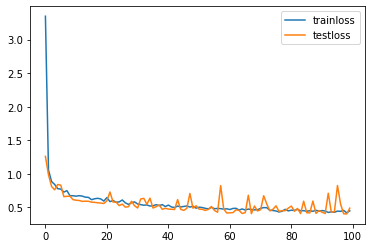

In [34]:
from matplotlib import pyplot
#pyplot.plot(history.history['accuracy'], label='*trainacc')
#pyplot.plot(history.history['val_accuracy'], label='*testacc')
pyplot.plot(history.history['loss'], label='trainloss')
pyplot.plot(history.history['val_loss'], label='testloss')
pyplot.legend()
pyplot.show()

In [35]:
Y.describe()

,Signal_Strength
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


# PART-2 BUILDING A CLASSIFIER

In [4]:
# Let us first one-hot encode the Y variable or the Signal Strength in order to 
# classify the strength of the signal
# Number of classes is 3


from tensorflow.keras.utils import to_categorical

# one hot encode

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

#y_train_encoded.shape
#y_test_encoded.shape
X_train.shape
y_train_encoded[0]
#y_train.head(5)


NameError: name 'y_train' is not defined

DNN
Let us build a sequential layer 

In [5]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Flatten())
model.add(tensorflow.keras.layers.BatchNormalization())
model.add(Dense(50,activation="relu"))
model.add(Dense(100,activation="relu",kernel_regularizer=l2(0.01)))
#model.add(Dense(150,activation="relu",kernel_regularizer=l2(0.005)))
model.add(Dense(9,activation="softmax"))

In [38]:
# Compile the model
#opt=sgd(lr=0.001,momentum=0.9)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
#history=model.fit(X_train, y_train_encoded, batch_size=64, epochs=300, validation_data=(X_test, y_test_encoded))
history=model.fit(X_train, y_train_encoded, batch_size=64, epochs=300, validation_split=0.35)

Epoch 1/300
30/30 [==============================] - 1s 7ms/step - loss: 2.4784 - accuracy: 0.1656 - val_loss: 2.3510 - val_accuracy: 0.3197
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 2.3145 - accuracy: 0.2933 - val_loss: 2.2212 - val_accuracy: 0.3487
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 2.1885 - accuracy: 0.3623 - val_loss: 2.1076 - val_accuracy: 0.3626
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 2.0731 - accuracy: 0.3689 - val_loss: 2.0087 - val_accuracy: 0.3896
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 1.9659 - accuracy: 0.4040 - val_loss: 1.9254 - val_accuracy: 0.4146
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 1.8757 - accuracy: 0.4332 - val_loss: 1.8506 - val_accuracy: 0.4376
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 1.8136 - accuracy: 0.4438 - val_loss: 1.7846 - val_accuracy: 0.4456
Epoch 8/300
3

Epoch 59/300
30/30 [==============================] - 0s 2ms/step - loss: 1.1648 - accuracy: 0.6383 - val_loss: 1.1694 - val_accuracy: 0.6523
Epoch 60/300
30/30 [==============================] - 0s 2ms/step - loss: 1.1317 - accuracy: 0.6438 - val_loss: 1.1680 - val_accuracy: 0.6603
Epoch 61/300
30/30 [==============================] - 0s 2ms/step - loss: 1.1699 - accuracy: 0.6444 - val_loss: 1.1751 - val_accuracy: 0.6304
Epoch 62/300
30/30 [==============================] - 0s 2ms/step - loss: 1.1748 - accuracy: 0.6184 - val_loss: 1.1612 - val_accuracy: 0.6713
Epoch 63/300
30/30 [==============================] - 0s 2ms/step - loss: 1.1309 - accuracy: 0.6516 - val_loss: 1.1584 - val_accuracy: 0.6783
Epoch 64/300
30/30 [==============================] - 0s 2ms/step - loss: 1.1622 - accuracy: 0.6233 - val_loss: 1.1562 - val_accuracy: 0.6723
Epoch 65/300
30/30 [==============================] - 0s 2ms/step - loss: 1.1360 - accuracy: 0.6598 - val_loss: 1.1493 - val_accuracy: 0.6643
Epoch 

30/30 [==============================] - 0s 2ms/step - loss: 0.8516 - accuracy: 0.7359 - val_loss: 0.8846 - val_accuracy: 0.7323
Epoch 174/300
30/30 [==============================] - 0s 2ms/step - loss: 0.8558 - accuracy: 0.7511 - val_loss: 0.8847 - val_accuracy: 0.7453
Epoch 175/300
30/30 [==============================] - 0s 2ms/step - loss: 0.8603 - accuracy: 0.7457 - val_loss: 0.8793 - val_accuracy: 0.7423
Epoch 176/300
30/30 [==============================] - 0s 2ms/step - loss: 0.8442 - accuracy: 0.7609 - val_loss: 0.8791 - val_accuracy: 0.7333
Epoch 177/300
30/30 [==============================] - 0s 2ms/step - loss: 0.8209 - accuracy: 0.7646 - val_loss: 0.8885 - val_accuracy: 0.7193
Epoch 178/300
30/30 [==============================] - 0s 2ms/step - loss: 0.8255 - accuracy: 0.7361 - val_loss: 0.8758 - val_accuracy: 0.7363
Epoch 179/300
30/30 [==============================] - 0s 2ms/step - loss: 0.8297 - accuracy: 0.7566 - val_loss: 0.8965 - val_accuracy: 0.7313
Epoch 180/300

30/30 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.7681 - val_loss: 0.8137 - val_accuracy: 0.7512
Epoch 288/300
30/30 [==============================] - 0s 2ms/step - loss: 0.7196 - accuracy: 0.7747 - val_loss: 0.8283 - val_accuracy: 0.7223
Epoch 289/300
30/30 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.7841 - val_loss: 0.8423 - val_accuracy: 0.7143
Epoch 290/300
30/30 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.7796 - val_loss: 0.8510 - val_accuracy: 0.7083
Epoch 291/300
30/30 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.7895 - val_loss: 0.7678 - val_accuracy: 0.7662
Epoch 292/300
30/30 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.8142 - val_loss: 0.8173 - val_accuracy: 0.7413
Epoch 293/300
30/30 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.7898 - val_loss: 0.7740 - val_accuracy: 0.7562
Epoch 294/300

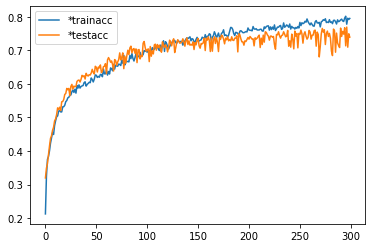

In [39]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='*trainacc')
pyplot.plot(history.history['val_accuracy'], label='*testacc')
#pyplot.plot(history.history['loss'], label='trainloss')
#pyplot.plot(history.history['val_loss'], label='testloss')
pyplot.legend()
pyplot.show()

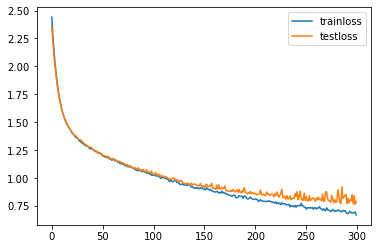

In [40]:
from matplotlib import pyplot
#pyplot.plot(history.history['accuracy'], label='*trainacc')
#pyplot.plot(history.history['val_accuracy'], label='*testacc')
pyplot.plot(history.history['loss'], label='trainloss')
pyplot.plot(history.history['val_loss'], label='testloss')
pyplot.legend()
pyplot.show()

In [63]:
model.evaluate(X_train, y_train_encoded)
model.evaluate(X_test, y_test_encoded)


39/39 [==============================] - 0s 526us/step - loss: 0.8374 - accuracy: 0.6933


[0.8373733758926392, 0.6933115720748901]

In [42]:
# I am also buildinga KNN model in order to classify the different groups 

In [43]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
NNH=KNeighborsClassifier(n_neighbors=5, weights ='distance')


In [44]:
NNH.fit(X_train, y_train_encoded)

KNeighborsClassifier(weights='distance')

In [45]:
y_Predict=NNH.predict(X_test)
NNH.score(X_test,y_test_encoded)

0.8140293637846656

# PART -4 AUTONOMOUS VEHICLE -

In [46]:
# Let us load the dataset:
import h5py
# Import all the given datasets and explore shape and size
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling

In [47]:
hf = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5','r')

In [48]:
dset_X_test =hf['X_test']
dset_X_train=hf['X_train']
dset_y_train=hf['y_train']
dset_y_test=hf['y_test']
dset_y_val=hf['y_val']

In [49]:
print(dset_y_val)

<HDF5 dataset "y_val": shape (60000,), type "|u1">


In [50]:
X_test1=np.array(dset_X_test)
X_train1=np.array(dset_X_train)
y_train1=np.array(dset_y_train)
y_test1=np.array(dset_y_test)
y_val1=np.array(dset_y_val)

In [51]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [52]:
X_train1 = X_train1.reshape(X_train1.shape[0], 32, 32, 1)
X_test1 = X_test1.reshape(X_test1.shape[0], 32, 32, 1)

In [53]:
X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')

X_train1 /= 255
X_test1 /= 255

In [54]:
print("X_train shape:", X_train1.shape)
print("Images in X_train:", X_train1.shape[0])
print("Images in X_test:", X_test1.shape[0])
print("Max value in X_train:", X_train1.max())
print("Min value in X_train:", X_train1.min())
print("Max value in y_train:", y_train1.max())
print("Min value in y_train:", y_train1.min())

X_train shape: (42000, 32, 32, 1)
Images in X_train: 42000
Images in X_test: 18000
Max value in X_train: 0.9999
Min value in X_train: 0.0
Max value in y_train: 9
Min value in y_train: 0


In [55]:
y_train1.shape

(42000,)

In [56]:
from tensorflow.keras.utils import to_categorical

y_train1 = to_categorical(y_train1, num_classes=10)
y_test1 = to_categorical(y_test1, num_classes=10)

print("Shape of y_train:", y_train1.shape)
print("One value of y_train:", y_train1[0])

Shape of y_train: (42000, 10)
One value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(200, activation="relu",kernel_regularizer=l2(0.001)))
model1.add(Dense(200, activation="relu",kernel_regularizer=l2(0.0001)))
model1.add(Dense(10, activation="softmax"))

In [65]:
# Compile the model
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
history=model1.fit(x=X_train1, y=y_train1, batch_size=64, epochs=200, validation_split=0.35)

Epoch 1/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5943 - accuracy: 0.8665 - val_loss: 0.6871 - val_accuracy: 0.8317
Epoch 2/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5757 - accuracy: 0.8731 - val_loss: 0.6535 - val_accuracy: 0.8437
Epoch 3/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5780 - accuracy: 0.8729 - val_loss: 0.6130 - val_accuracy: 0.8599
Epoch 4/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5743 - accuracy: 0.8723 - val_loss: 0.5846 - val_accuracy: 0.8698
Epoch 5/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5634 - accuracy: 0.8788 - val_loss: 0.9608 - val_accuracy: 0.7666
Epoch 6/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5768 - accuracy: 0.8738 - val_loss: 0.7219 - val_accuracy: 0.8277
Epoch 7/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5691 - accuracy: 0.8739 - val_loss: 0.5854 - val_accuracy: 0.8721

Epoch 58/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5300 - accuracy: 0.8894 - val_loss: 0.7471 - val_accuracy: 0.8247
Epoch 59/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5343 - accuracy: 0.8873 - val_loss: 0.6396 - val_accuracy: 0.8575
Epoch 60/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5099 - accuracy: 0.8940 - val_loss: 1.0952 - val_accuracy: 0.7309
Epoch 61/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.8905 - val_loss: 0.7122 - val_accuracy: 0.8384
Epoch 62/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5189 - accuracy: 0.8942 - val_loss: 0.6485 - val_accuracy: 0.8556
Epoch 63/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5171 - accuracy: 0.8956 - val_loss: 0.7448 - val_accuracy: 0.8256
Epoch 64/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5278 - accuracy: 0.8890 - val_loss: 0.6767 - val_accuracy:

Epoch 115/200
427/427 [==============================] - 1s 2ms/step - loss: 0.4968 - accuracy: 0.8992 - val_loss: 0.7530 - val_accuracy: 0.8259
Epoch 116/200
427/427 [==============================] - 1s 2ms/step - loss: 0.4956 - accuracy: 0.9001 - val_loss: 0.8247 - val_accuracy: 0.8090
Epoch 117/200
427/427 [==============================] - 1s 2ms/step - loss: 0.4939 - accuracy: 0.9004 - val_loss: 0.7649 - val_accuracy: 0.8235
Epoch 118/200
427/427 [==============================] - 1s 2ms/step - loss: 0.4966 - accuracy: 0.9027 - val_loss: 0.9748 - val_accuracy: 0.7651
Epoch 119/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5042 - accuracy: 0.9000 - val_loss: 0.7917 - val_accuracy: 0.8186
Epoch 120/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5008 - accuracy: 0.8995 - val_loss: 0.6631 - val_accuracy: 0.8567
Epoch 121/200
427/427 [==============================] - 1s 2ms/step - loss: 0.5064 - accuracy: 0.8995 - val_loss: 0.6982 - val_ac

In [66]:
model1.evaluate(X_train1, y_train1)
model1.evaluate(X_test1, y_test1)

563/563 [==============================] - 0s 733us/step - loss: 0.9213 - accuracy: 0.7943


[0.9212803840637207, 0.7943333387374878]

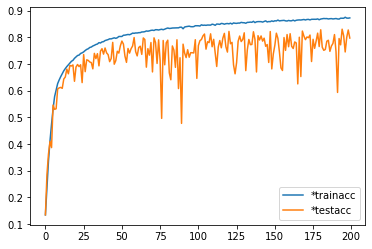

In [60]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='*trainacc')
pyplot.plot(history.history['val_accuracy'], label='*testacc')
#pyplot.plot(history.history['loss'], label='trainloss')
#pyplot.plot(history.history['val_loss'], label='testloss')
pyplot.legend()
pyplot.show()

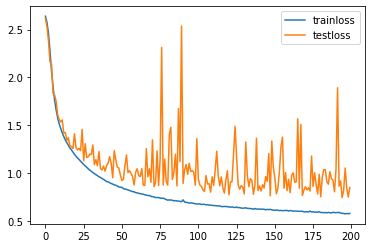

In [61]:
from matplotlib import pyplot
#pyplot.plot(history.history['accuracy'], label='*trainacc')
#pyplot.plot(history.history['val_accuracy'], label='*testacc')
pyplot.plot(history.history['loss'], label='trainloss')
pyplot.plot(history.history['val_loss'], label='testloss')
pyplot.legend()
pyplot.show()

# OBSERVATIONS


- As can be seen the training accuracy is aorund 83% and the testing accuracy is around 80% . The accuracy and the loss plots are also shown in the graph , this behaviour shows that with increasing epochs the training and testing loss or accuracy is not diverging much and is staying close to each other.
- This is happening because I have used the L2 regularization technique and making sure that the losses and accuracies do not diverge.
- Adding the regularization does push the accuracy down but it is tradeoff that we need to do in order to prevent divergence or overfitting.